In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from skforecast.ForecasterAutoreg import ForecasterAutoreg
from sklearn.metrics import mean_squared_error

import sys
sys.path.append("..")

### Load data

In [2]:
train = pd.read_csv("../data/train.txt", sep="|", index_col=0)
val   = pd.read_csv("../data/val.txt", sep="|", index_col=0)

In [3]:
print(train.shape)
train.head()

(40335, 14)


,pm2_5,hour_sin,hour_cos,NE,NW,SE,SW,Fri,Mon,Sat,Sun,Thu,Tue,Wed
date,,,,,,,,,,,,,,
2010-01-02 00:00:00,129.0,0.000000,1.000000,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2010-01-02 01:00:00,148.0,0.269797,0.962917,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2010-01-02 02:00:00,159.0,0.519584,0.854419,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2010-01-02 03:00:00,181.0,0.730836,0.682553,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2010-01-02 04:00:00,138.0,0.887885,0.460065,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


### Build and train model

In [4]:
seed = 421
target = "pm2_5"
lags = 2

In [5]:
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(random_state=seed),
                lags      = lags
             )
forecaster.fit(y=train[target], 
               exog=train.drop(columns = [target]).values)
forecaster

=======================ForecasterAutoreg=======================
Regressor: RandomForestRegressor(random_state=421)
Lags: [1 2]
Exogenous variable: True
Parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'mse', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 421, 'verbose': 0, 'warm_start': False}

In [44]:
y_pred_train = forecaster.predict(steps=train.shape[0], 
                                  exog=train.drop(columns = [target]).values)

error_rmse = mean_squared_error(
                y_true = train[target],
                y_pred = y_pred_train, squared=False
            )
print(f"Error train (rmse): {error_rmse}")

In [6]:
y_pred = forecaster.predict(steps=val.shape[0], 
                            exog=val.drop(columns = [target]).values)

error_rmse = mean_squared_error(
                y_true = val[target],
                y_pred = y_pred, squared=False
            )
print(f"Error validation (rmse): {error_rmse}")

Error validation (rmse): 99.41509734913917


In [7]:
assert val.shape[0] == len(y_pred)

In [8]:
pred_df = pd.DataFrame(val[target])
pred_df["pred"] = y_pred

<AxesSubplot:xlabel='date'>

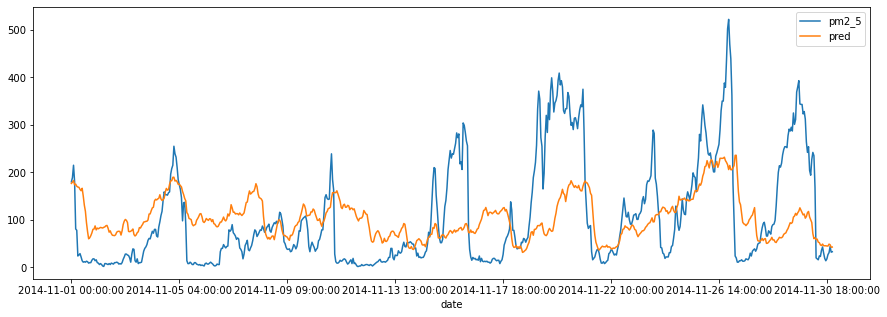

In [12]:
pred_df.plot(figsize=(15, 5))

In [ ]:
# antes de todo esto, documentar el proceso
# agregar logger
# utilizar dvc para trackear los experimentos, versionar la data
# agregar features: week day y weekend
# interacciones entre hora y weekend
# eliminar las binarias del dia
# probar con estos cambios, el mismo algoritmo y probar con mas algoritmos